In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [5]:
df = pd.read_csv("framingham.csv")

In [3]:
df.shape

(4240, 16)

In [24]:
imputer = SimpleImputer(strategy='median')  # or 'mean'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [25]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

In [26]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [27]:
knee = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"\n✅ Optimal number of clusters (k): {optimal_k}")


✅ Optimal number of clusters (k): 5


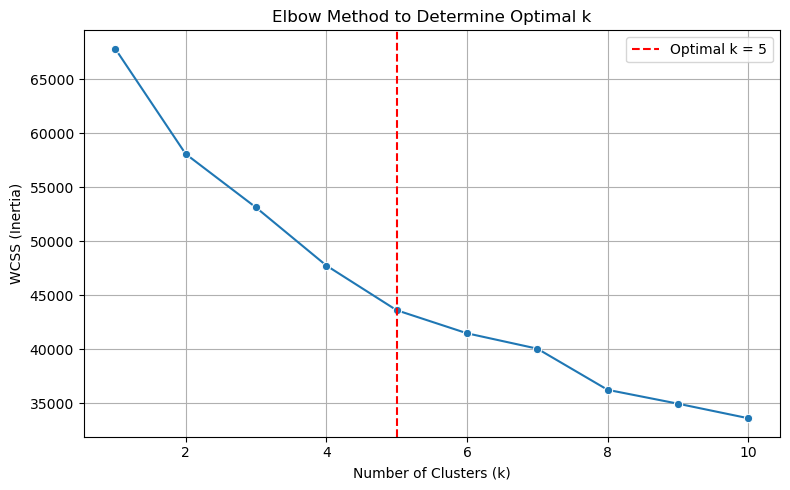

In [28]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=wcss, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_scaled)

In [30]:
df_imputed['Cluster'] = cluster_labels

In [31]:
print("\n🔹 Sample records with cluster labels:")
print(df_imputed[['Cluster']].value_counts().reset_index(name='Count'))


🔹 Sample records with cluster labels:
   Cluster  Count
0        1   1591
1        2   1369
2        0   1147
3        3    108
4        4     25


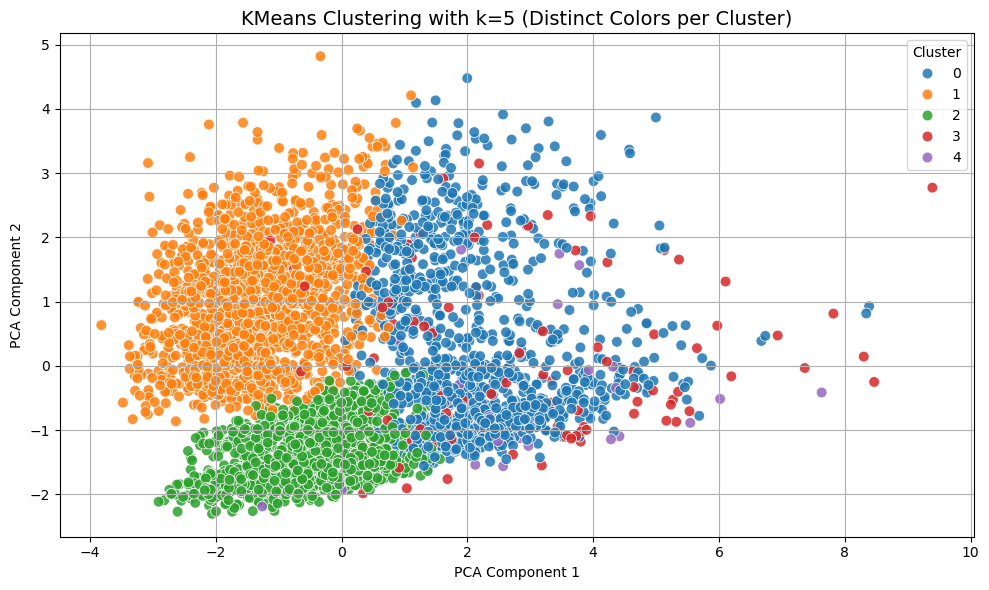

In [35]:
# Apply KMeans with 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
clusters_5 = kmeans_5.fit_predict(df_scaled)
df_imputed['Cluster'] = clusters_5

# Reduce dimensions with PCA for 2D plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_imputed['PCA1'] = pca_result[:, 0]
df_imputed['PCA2'] = pca_result[:, 1]

# Define a custom color palette for 5 clusters
palette = {
    0: '#1f77b4',  # blue
    1: '#ff7f0e',  # orange
    2: '#2ca02c',  # green
    3: '#d62728',  # red
    4: '#9467bd'   # purple
}

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette=palette,
    s=60,
    alpha=0.85
)
plt.title("KMeans Clustering with k=5 (Distinct Colors per Cluster)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Cluster,PCA1,PCA2
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,2,-1.885436,-0.998300
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,2,-0.132507,-1.342795
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1,-1.026176,1.406886
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0,1.850507,1.973315
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,1,-0.870347,0.998099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,1,-1.298826,0.650422
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0,1,-1.209031,0.622922
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0,2,0.057121,-1.535908
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0,0,0.659325,-0.289177


In [9]:
df['TenYearCHD'].value_counts()


TenYearCHD
0    3596
1     644
Name: count, dtype: int64